In [ ]:
# Load raw corpora. Generate and save embeddings.

! git clone https://github.com/facebookresearch/MUSE
! git pull

Cloning into 'MUSE'...
remote: Enumerating objects: 239, done.
remote: Total 239 (delta 0), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (239/239), 211.37 KiB | 6.82 MiB/s, done.
Resolving deltas: 100% (136/136), done.
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
! conda install pytorch torchvision -c pytorch

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [ ]:
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh

!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh

!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local

sys.path.append('/usr/local/lib/python3.6/site-packages')

--2020-06-16 22:31:36--  https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh [following]
--2020-06-16 22:31:36--  https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 577996269 (551M) [application/x-sh]
Saving to: ‘Anaconda3-5.1.0-Linux-x86_64.sh’

Anaconda3-5.1.0-Lin 100%[===================>] 551.22M   159MB/s    in 3.5s    

2020-06-16 22:31:40 (156 MB/s) - ‘Anaconda3-5.1.0-Linux-x86_64.sh’ sa

NameError: ignored

In [ ]:
import cython
from gensim.models import Word2Vec, Phrases
from google.colab import drive
import io
import numpy as np
import logging

drive.mount('/content/drive')
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
! conda install faiss-cpu -c pytorch

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current vers

In [ ]:
augRN = open('/content/drive/My Drive/rn_aug.txt','r')
fileRN = augRN.readlines()
line_augRN = [row.split() for row in fileRN]
phrase_augRN = Phrases(line_augRN, min_count=5, threshold=1)
lines_augRN = phrase_augRN[line_augRN]
model_augRN = Word2Vec(min_count=3, window=5, size=300, sample=0.001, alpha=0.01, min_alpha=0.0005, negative=10, workers=4, sg=1)
model_augRN.build_vocab(lines_augRN)
model_augRN.train(lines_augRN, total_examples=model_augRN.corpus_count, epochs=150)

2020-06-16 18:03:47,228 : INFO : collecting all words and their counts
2020-06-16 18:03:47,229 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-06-16 18:03:47,412 : INFO : PROGRESS: at sentence #10000, processed 130411 words and 14395 word types
2020-06-16 18:03:47,416 : INFO : collected 14395 word types from a corpus of 132827 words (unigram + bigrams) and 10119 sentences
2020-06-16 18:03:47,417 : INFO : using 14395 counts as vocab in Phrases<0 vocab, min_count=5, threshold=1, max_vocab_size=40000000>
/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
2020-06-16 18:03:47,419 : INFO : collecting all words and their counts
2020-06-16 18:03:47,421 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-06-16 18:03:47,924 : INFO : PROGRESS: at sen

(9676666, 16013850)

In [ ]:
save_augRN = model_augRN.wv.save_word2vec_format('augRN.vec')
augRN.close()

2020-06-16 18:06:47,856 : INFO : storing 1920x300 projection weights into augRN.vec
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
armsRR = open('/content/drive/My Drive/rongo_arms.txt','r')
fileRR = armsRR.readlines()
line_armsRR = [row.split() for row in fileRR]
bigram = Phrases(line_armsRR, min_count=5, threshold=1) 
trigram = Phrases(bigram[line_armsRR], min_count=3, threshold=1)
tetragram = Phrases(trigram[bigram[line_armsRR]], min_count=2, threshold=1)
pentagram = Phrases(tetragram[trigram[bigram[line_armsRR]]], min_count=1, threshold=1)
lines_armsRR = pentagram[tetragram[trigram[bigram[line_armsRR]]]]
model_armsRR = Word2Vec(min_count=3, window=5, size=300, sample=0.1, alpha=0.01, min_alpha=0.0005, negative=10, workers=4, sg=1)
model_armsRR.build_vocab(lines_armsRR)
model_armsRR.train(lines_armsRR, total_examples=model_armsRR.corpus_count, epochs=150, report_delay=10)

2020-06-16 22:39:27,078 : INFO : collecting all words and their counts
2020-06-16 22:39:27,079 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-06-16 22:39:27,105 : INFO : collected 6850 word types from a corpus of 16795 words (unigram + bigrams) and 26 sentences
2020-06-16 22:39:27,106 : INFO : using 6850 counts as vocab in Phrases<0 vocab, min_count=5, threshold=1, max_vocab_size=40000000>
/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
2020-06-16 22:39:27,111 : INFO : collecting all words and their counts
2020-06-16 22:39:27,117 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-06-16 22:39:27,177 : INFO : collected 8363 word types from a corpus of 14609 words (unigram + bigrams) and 26 sentences
2020-06-16 22:39:27,177 : INFO : using 836

(988650, 1355250)

In [ ]:
sylRN = open('/content/drive/My Drive/rn_aug_syl.txt','r')
fileRN2 = sylRN.readlines()
line_sylRN = [row.split() for row in fileRN2]
bigram = Phrases(line_sylRN, min_count=5, threshold=1) 
trigram = Phrases(bigram[line_sylRN], min_count=3, threshold=1)
tetragram = Phrases(trigram[bigram[line_sylRN]], min_count=2, threshold=1)
pentagram = Phrases(tetragram[trigram[bigram[line_sylRN]]], min_count=1, threshold=1)
lines_sylRN = pentagram[tetragram[trigram[bigram[line_sylRN]]]]
model_sylRN = Word2Vec(min_count=3, window=5, size=300, sample=0.1, alpha=0.01, min_alpha=0.0005, negative=10, workers=4, sg=1)
model_sylRN.build_vocab(lines_sylRN)
model_sylRN.train(lines_sylRN, total_examples=model_sylRN.corpus_count, epochs=150, report_delay=10)

2020-06-16 22:41:09,207 : INFO : collecting all words and their counts
2020-06-16 22:41:09,207 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-06-16 22:41:09,494 : INFO : PROGRESS: at sentence #10000, processed 252178 words and 2357 word types
2020-06-16 22:41:09,503 : INFO : collected 2357 word types from a corpus of 256980 words (unigram + bigrams) and 10119 sentences
2020-06-16 22:41:09,504 : INFO : using 2357 counts as vocab in Phrases<0 vocab, min_count=5, threshold=1, max_vocab_size=40000000>
/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
2020-06-16 22:41:09,506 : INFO : collecting all words and their counts
2020-06-16 22:41:09,507 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-06-16 22:41:10,606 : INFO : PROGRESS: at sentence #1

(38371950, 38380950)

In [ ]:
save_sylRN = model_sylRN.wv.save_word2vec_format('sylRN.vec')
sylRN.close()
save_armsRR = model_armsRR.wv.save_word2vec_format('armsRR.vec')
armsRR.close()

2020-06-16 22:54:42,008 : INFO : storing 99x300 projection weights into sylRN.vec
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-06-16 22:54:42,034 : INFO : storing 757x300 projection weights into armsRR.vec


In [ ]:
# Align word embeddings.

%cd MUSE
! python unsupervised.py --cuda False --src_emb ../sylRN.vec --tgt_emb ../armsRR.vec --max_vocab 65536 --n_epochs 30  --epoch_size 256 --n_refinement 5 --src_lang rn --tgt_lang rr

[Errno 2] No such file or directory: 'MUSE'
/content/MUSE
Impossible to import Faiss library!! Switching to standard nearest neighbors search implementation, this will be significantly slower.

INFO - 06/16/20 22:57:31 - 0:00:00 - ============ Initialized logger ============
INFO - 06/16/20 22:57:31 - 0:00:00 - adversarial: True
                                     batch_size: 32
                                     cuda: False
                                     dico_build: S2T
                                     dico_eval: default
                                     dico_max_rank: 15000
                                     dico_max_size: 0
                                     dico_method: csls_knn_10
                                     dico_min_size: 0
                                     dico_threshold: 0
                                     dis_clip_weights: 0
                                     dis_dropout: 0.0
                                     dis_hid_dim: 2048
          

In [ ]:
# View nearest neighbors in English alphabet and characters.
def load_vec(path):
	vectors = []
	word2 = {}
	with io.open(path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
		next(f)
		for i, line in enumerate(f):
			word, vec = line.rstrip().split(' ',1)
			vec = np.fromstring(vec, sep=' ')
			assert word not in word2, 'word found twice'
			vectors.append(vec)
			word2[word] = len(word2)
	id2 = {v: k for k, v in word2.items()}
	embeddings = np.vstack(vectors)
	return embeddings, id2, word2

rn_embeddings, rn_id2, rn_word2 = load_vec('/content/MUSE/dumped/debug/mw93nc2g84/vectors-rn.txt')
rr_embeddings, rr_id2, rr_word2 = load_vec('/content/MUSE/dumped/debug/mw93nc2g84/vectors-rr.txt')

In [ ]:
def neighbors(word, src_emb, src_id2, tgt_emb, tgt_id2):
	word2 = {v: k for k, v in src_id2.items()}
	word_emb = src_emb[word2[word]]
	scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
	k_best = scores.argsort()[-10:][::-1]
	for i, idx in enumerate(k_best):
		print('%.4f - %s' % (scores[idx], tgt_id2[idx]))

rn_word = 'ki'
neighbors(rn_word, rn_embeddings, rn_id2, rn_embeddings, rn_id2)
neighbors(rn_word, rn_embeddings, rn_id2, rr_embeddings, rr_id2)

1.0000 - ki
0.4890 - i
0.4727 - va
0.4576 - ta
0.4516 - a
0.4453 - ri
0.4253 - te
0.4244 - po
0.4042 - vi
0.3883 - ga
0.6803 - 022_700_002_001
0.5666 - 010_300
0.5260 - 002_300
0.5205 - 700_003_020
0.5135 - 003_005
0.5125 - 027_006
0.4949 - 522_003_022_003
0.4856 - 081_004_660
0.4827 - 042_700
0.4792 - 230


In [ ]:
# Plot embeddings in both writing systems using PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(np.vstack([rn_embeddings, rr_embeddings]))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [ ]:
import matplotlib.pyplot as plt
def plot(src_words, src_word2, src_emb, tgt_words, tgt_word2, tgt_emb, pca):
	Y = []
	Z = []
	word_labels = []
	for sw in src_word2:
		Y.append(src_emb[src_word2[sw]])
		word_labels.append(sw)
	for tw in tgt_word2:
		Z.append(tgt_emb[tgt_word2[tw]])
		word_labels.append(tw)
	Y = pca.transform(Y)
	Z = pca.transform(Z)
	x_coords = Y[:,0]
	y_coords = Y[:, 1]
	x2 = Z[:,0]
	y2 = Z[:, 1]
	
	plt.figure(figsize=(15,10), dpi=80)
	plt.scatter(x_coords, y_coords)
	plt.scatter(x2,y2,marker='x')

	for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
		color = 'blue' if k < len(src_words) else 'red'  # src words in blue / tgt words in red
		plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=8, color='red')

	plt.title('RN and RR Common Space')
	plt.show()

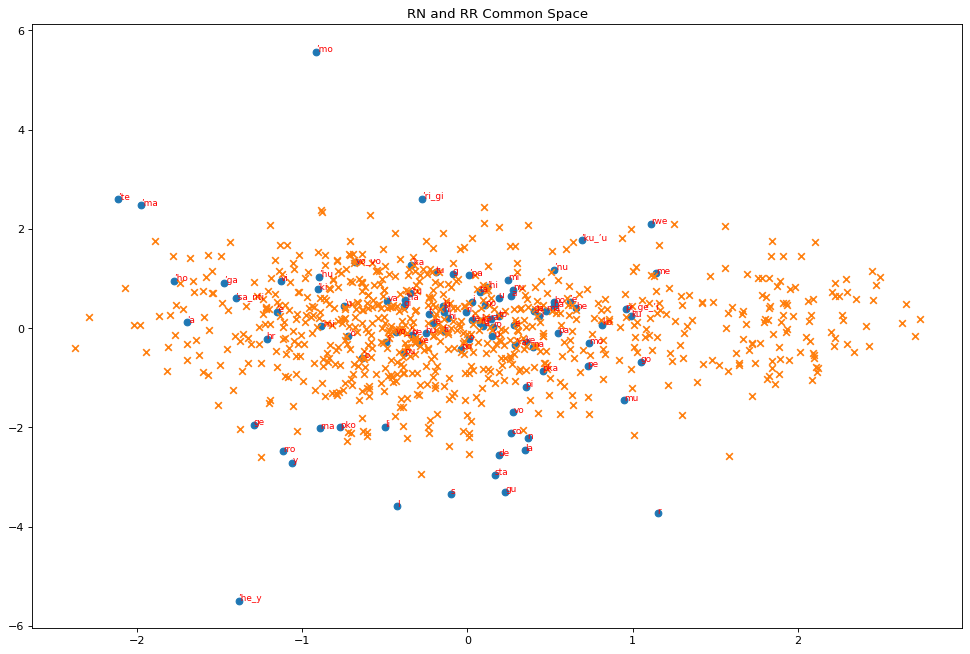

In [ ]:
rn_words = []
rr_words = []
plot(rn_words, rn_word2, rn_embeddings, rr_words, rr_word2, rr_embeddings, pca)